# Happy or Sad Classifier!

In [15]:
import os
base='E:\\DataSets'
a=os.path.join(base, 'happy-or-sad')
Train_happy=os.path.join(a, 'happy')
c=os.listdir( Train_happy )
print(c[:10])
Train_sad=os.path.join(a, 'sad')
d=os.listdir( Train_sad )
print(d[:10])


['happy1-00.png', 'happy1-01.png', 'happy1-02.png', 'happy1-03.png', 'happy1-04.png', 'happy1-05.png', 'happy1-06.png', 'happy1-07.png', 'happy1-08.png', 'happy1-09.png']
['sad1-00.png', 'sad1-01.png', 'sad1-02.png', 'sad1-03.png', 'sad1-04.png', 'sad1-05.png', 'sad1-06.png', 'sad1-07.png', 'sad1-08.png', 'sad1-09.png']


In [21]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

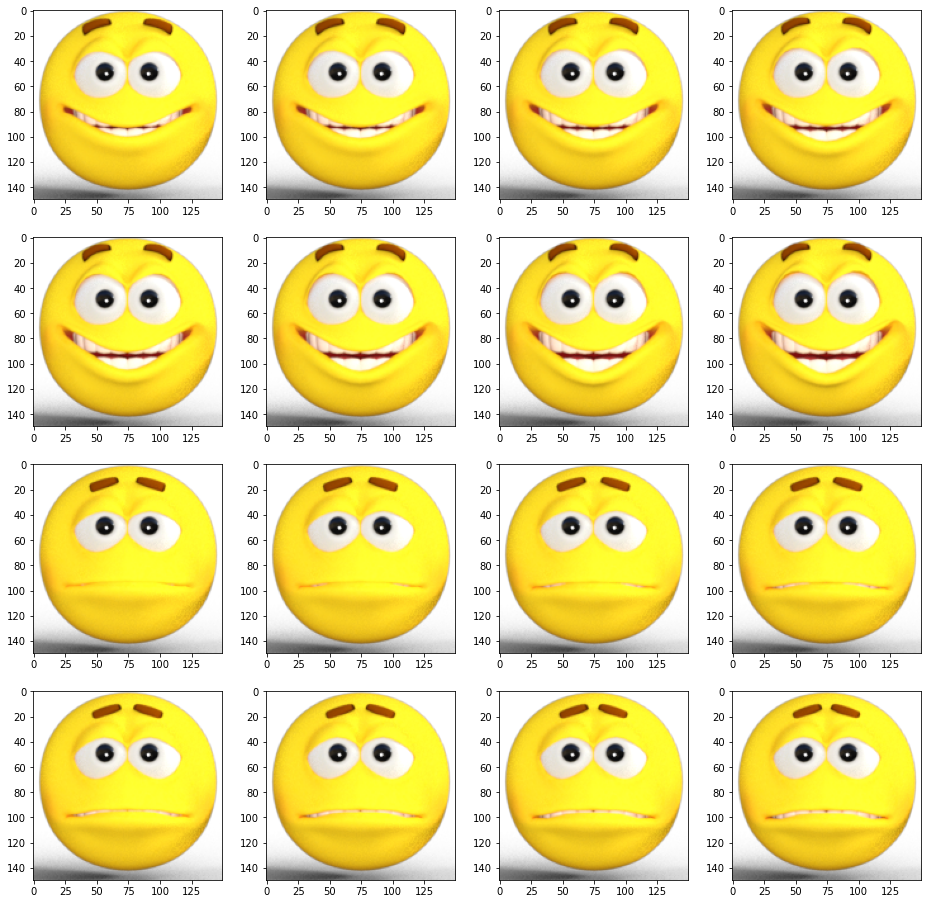

In [23]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_train_mirror_pix = [os.path.join(Train_happy, fname) 
                for fname in c[ pic_index-8:pic_index] 
               ]

next_train_No_mirror_pix = [os.path.join(Train_sad, fname) 
                for fname in d[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_train_mirror_pix+next_train_No_mirror_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [16]:
import tensorflow as tf
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=0,
      width_shift_range=0,
      height_shift_range=0,
      shear_range=0,
      zoom_range=0,
      horizontal_flip=False,
      fill_mode='nearest' )
train_generator = train_datagen.flow_from_directory(a,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

Found 80 images belonging to 2 classes.


In [19]:
history = model.fit(train_generator,
                     steps_per_epoch=8,
                     epochs=5,
                     verbose=1)          
                             
                    

  ...
    to  
  ['...']
Train for 8 steps
Epoch 1/5
8/8 [==============================] - 5s 599ms/step - loss: 2.2030 - acc: 0.6125
Epoch 2/5
8/8 [==============================] - 3s 413ms/step - loss: 0.4419 - acc: 0.8375
Epoch 3/5
8/8 [==============================] - 3s 399ms/step - loss: 0.3815 - acc: 0.7875
Epoch 4/5
8/8 [==============================] - 3s 389ms/step - loss: 0.1411 - acc: 0.9750
Epoch 5/5
8/8 [==============================] - 3s 389ms/step - loss: 0.0951 - acc: 0.9625


# Good Training accuracy of about 97% is acheived.